In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [43]:
df = sns.load_dataset("titanic").drop(columns=['alive', 'deck'])

In [44]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [45]:
X_test=test.drop(columns='survived')
y_test=test[['survived']]

We have already read the data and now its time for data preprocessing.Looking at the various mean values and also finding if there is any null value in our dataset and various other steps .


In [46]:
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
train.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
331,False,False,False,False,False,False,False,False,False,False,False,False,False
733,False,False,False,False,False,False,False,False,False,False,False,False,False
382,False,False,False,False,False,False,False,False,False,False,False,False,False
704,False,False,False,False,False,False,False,False,False,False,False,False,False
813,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,False,False,False,False,False,False,False,False,False,False,False,False,False
270,False,False,False,True,False,False,False,False,False,False,False,False,False
860,False,False,False,False,False,False,False,False,False,False,False,False,False
435,False,False,False,False,False,False,False,False,False,False,False,False,False


From here we can see that there are null values in our Cabin and Age column but a better way to see this is by plotting heatmap using seaborn lib or by just getting info about the datset.

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          572 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     710 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  710 non-null    object  
 12  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.4+ KB


<Axes: >

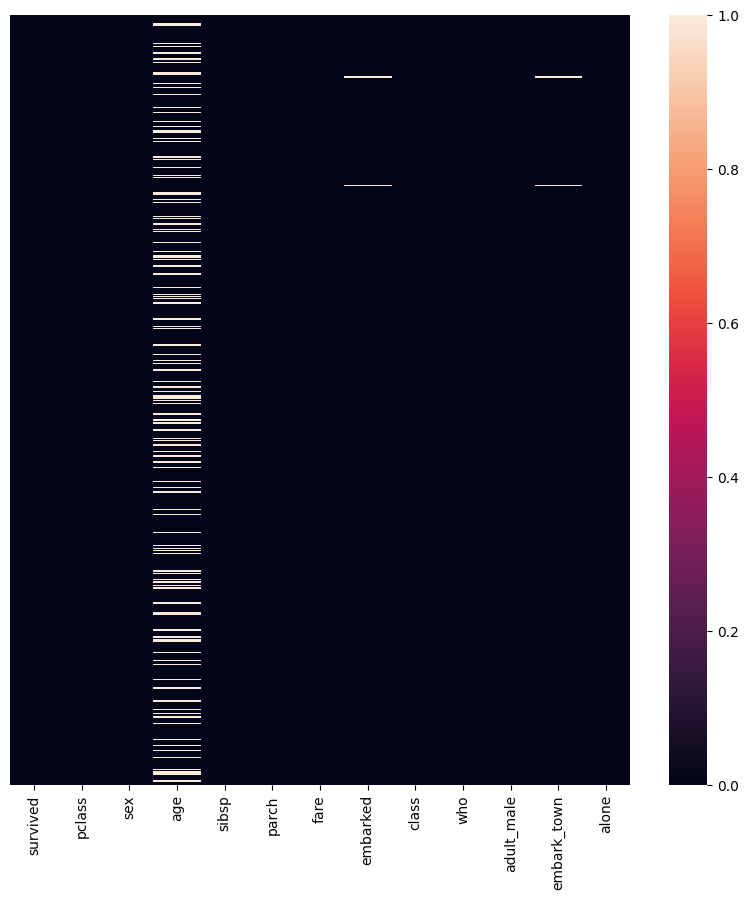

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)


From here we can see that there are null values in **Embarked column** as well and we might want to remove this null values for a better result.

So lets deal with the Age dataset first and try to replace these NaN values with some values that can do well.One way to do so is to just replace the values with the mean of the ages of all but that will not be a good option as you will see further how the value changes. 

Lets plot some of the graphs and identify the relationship of age with other features.

<Axes: xlabel='pclass', ylabel='age'>

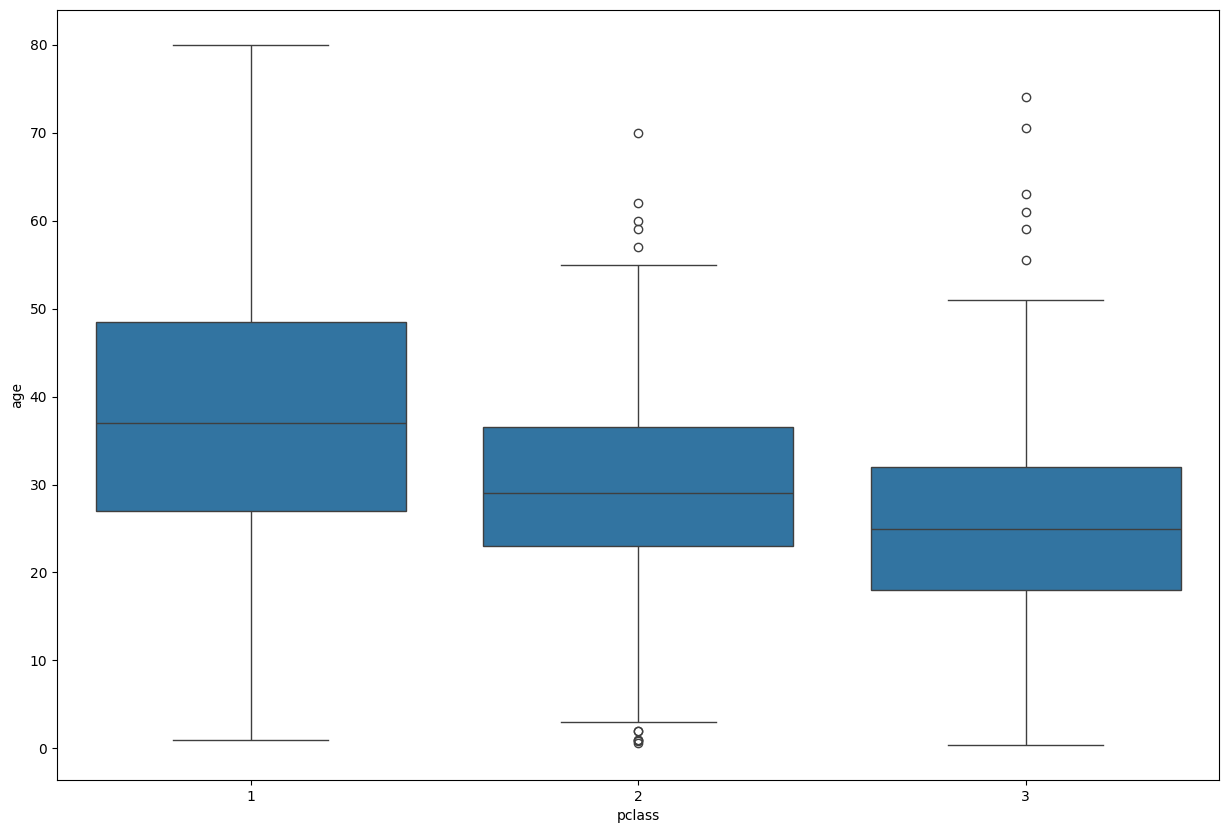

In [50]:
plt.figure(figsize=(15,10))
sns.boxplot(x='pclass',y='age', data=train)

From this we can see that the average age for Pclass 1 is around 38 where as for other classes its 29 and 23 respectively. So just by doing the mean we would have replaced the value to 29.6 which would have not performed as good as this . So lets replace the NaN values with the values we found for each class.

In [51]:
def Age_1(cols) :
    Age=cols[0]
    Pclass=cols[1] 
    
    if pd.isnull(Age) :
        if Pclass==1 :
            return 38
        elif Pclass==2:
            return 29
        else :
            return 24
    else :
        return Age
                

In [52]:
train['age']=train[['age','pclass']].apply(Age_1,axis=1)

/var/folders/gl/nlbr9h6d001c6mdh1d8sy7fc0000gp/T/ipykernel_2528/1393391282.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/gl/nlbr9h6d001c6mdh1d8sy7fc0000gp/T/ipykernel_2528/1393391282.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Now there is NaN value in Embarked column and that also only two of them . So Just dropping these two values wont make much difference in our dataset.

In [53]:
train=train.dropna(axis=0,how='any')

Lets see if our dataset contains any NaN values or not . 

<Axes: >

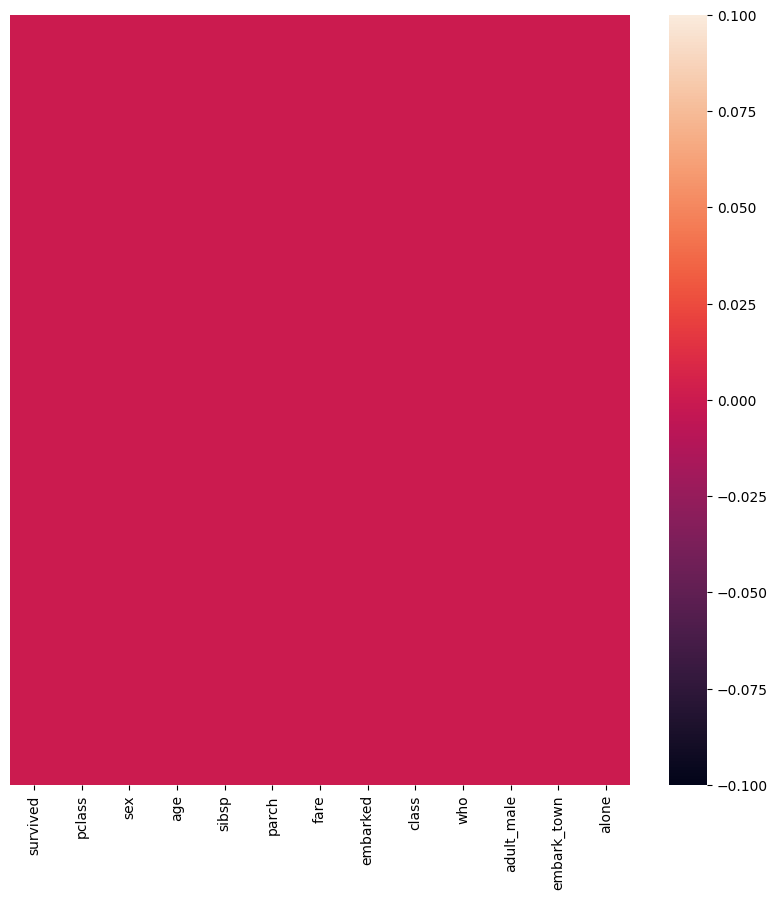

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)

Here we will also have to remove the NaN values and replace it will other values and repeat the same steps on your X_test dataset also bcz it also contains null values. I have just done that in one cell but you can do it by following previous steps . 

<Axes: xlabel='pclass', ylabel='age'>

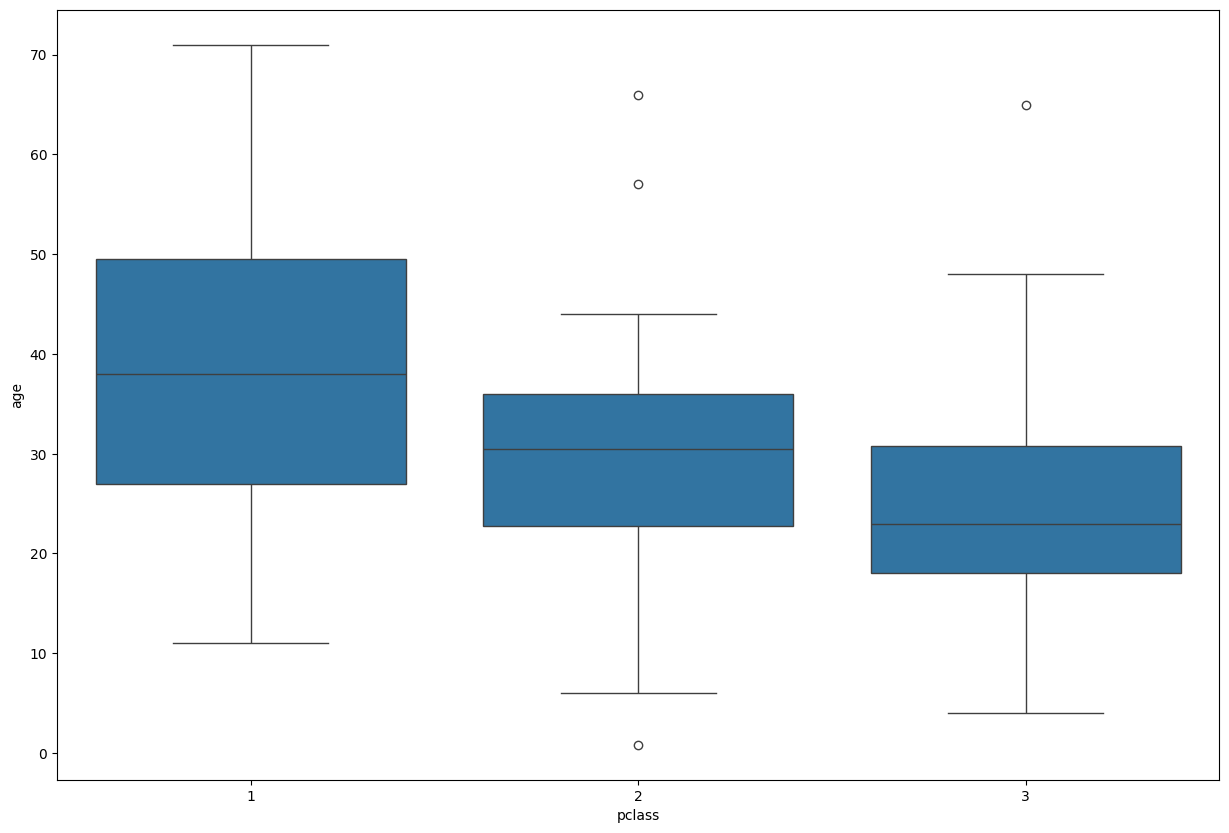

In [55]:
plt.figure(figsize=(15,10))
sns.boxplot(x='pclass',y='age',data=X_test)


In [56]:
def Age_1(cols) :
    Age=cols[0]
    Pclass=cols[1] 
    
    if pd.isnull(Age) :
        if Pclass==1 :
            return 42 
        elif Pclass==2:
            return 25
        else :
            return 22
    else :
        return Age
                

In [57]:
X_test['age']=X_test[['age','pclass']].apply(Age_1,axis=1)

/var/folders/gl/nlbr9h6d001c6mdh1d8sy7fc0000gp/T/ipykernel_2528/2144672487.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/gl/nlbr9h6d001c6mdh1d8sy7fc0000gp/T/ipykernel_2528/2144672487.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Now 

 Lets start visualising it in depth and get some insight out of it .

<Axes: xlabel='survived', ylabel='count'>

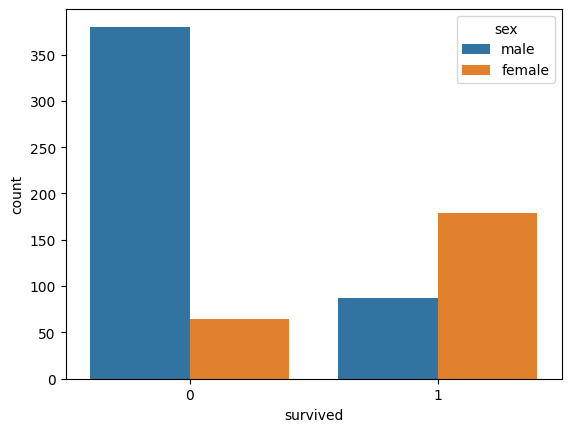

In [58]:
sns.countplot(x='survived',hue='sex',data=train)


This clearly shows that a lot of females survived over males .

<Axes: xlabel='pclass', ylabel='fare'>

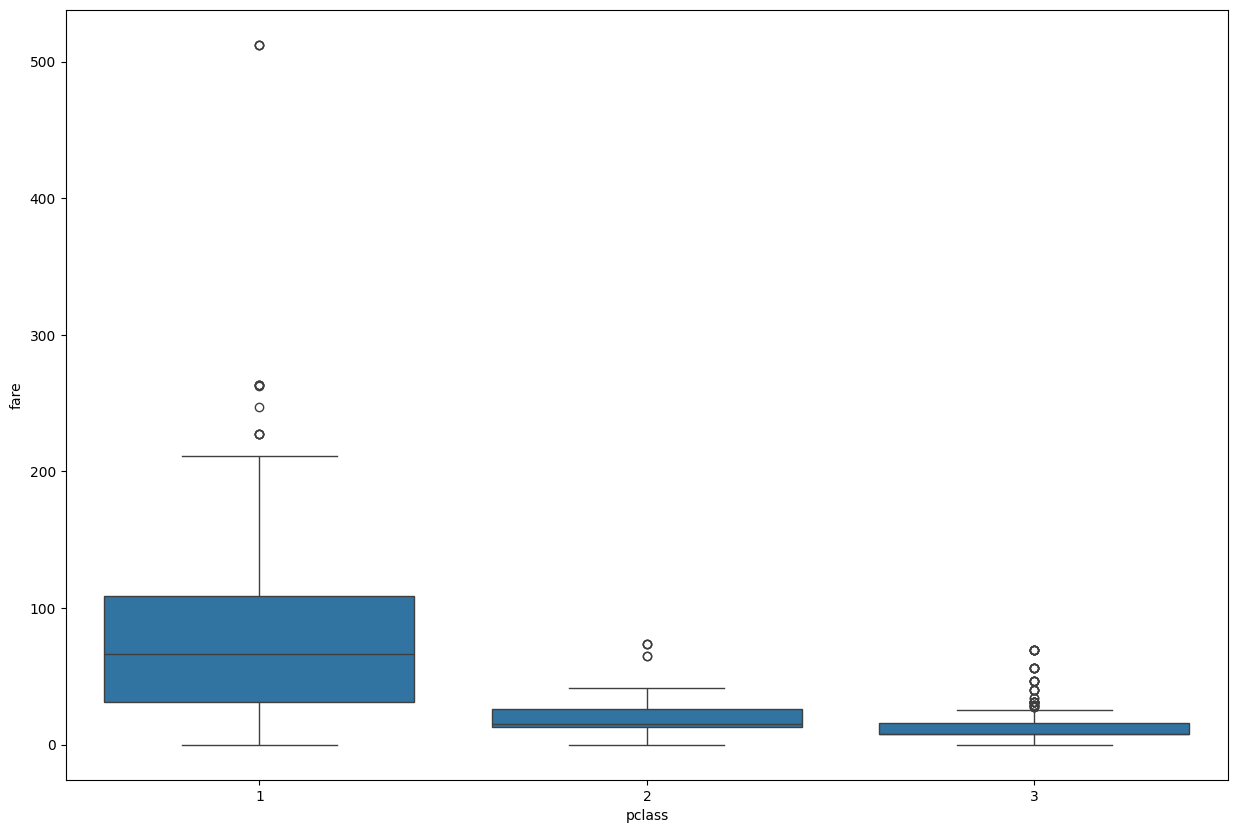

In [59]:
plt.figure(figsize=(15,10))
sns.boxplot(x='pclass',y='fare',data=train)

This tells us that for Pclass 1 they actually paid higher money while other classes didnt pay much money but also Pclass 1 and 3 have a lotmore outliers that would led to overfitting so it must be taken care off.

<Axes: xlabel='survived', ylabel='count'>

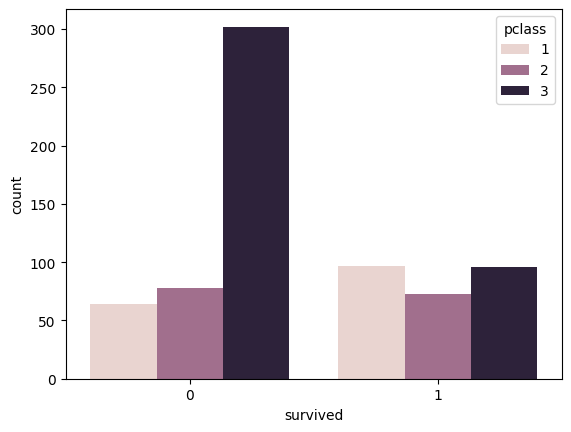

In [60]:
sns.countplot(x='survived',hue='pclass',data=train)

Survival rate of Pclass is much more than other but for Pclass 2 is almost the same and so by seeing this we cant just ignore the Fare feature and drop it and it is very crucial for further predictions. 

/var/folders/gl/nlbr9h6d001c6mdh1d8sy7fc0000gp/T/ipykernel_2528/3716012815.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='fare', ylabel='Density'>

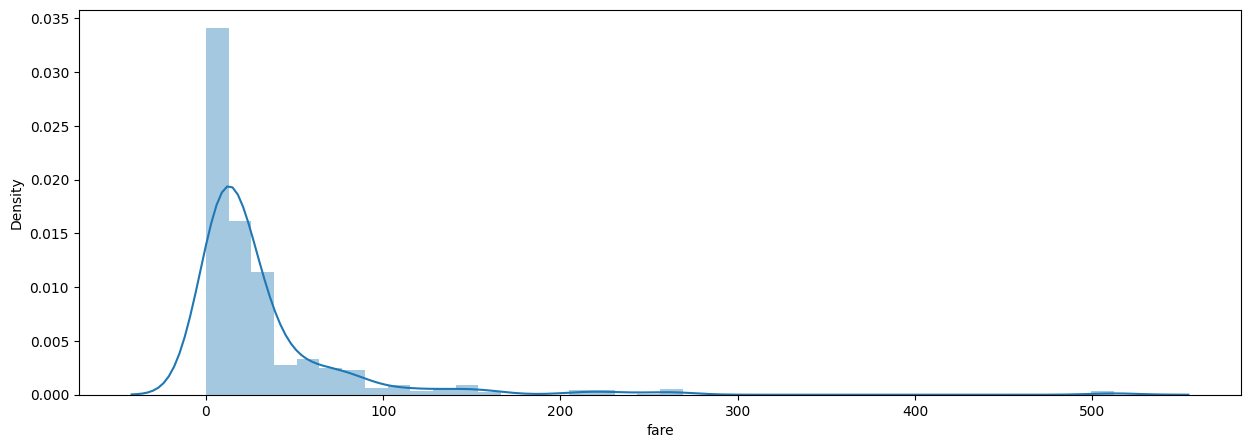

In [61]:
plt.figure(figsize=(15,5))
sns.distplot(train['fare'],bins=40)

This doesnt look like a proper gaussian curve and might tend to overfit the curve as it has very less values of people survived for fare greater than 80$.

/var/folders/gl/nlbr9h6d001c6mdh1d8sy7fc0000gp/T/ipykernel_2528/2339626859.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='fare', ylabel='Density'>

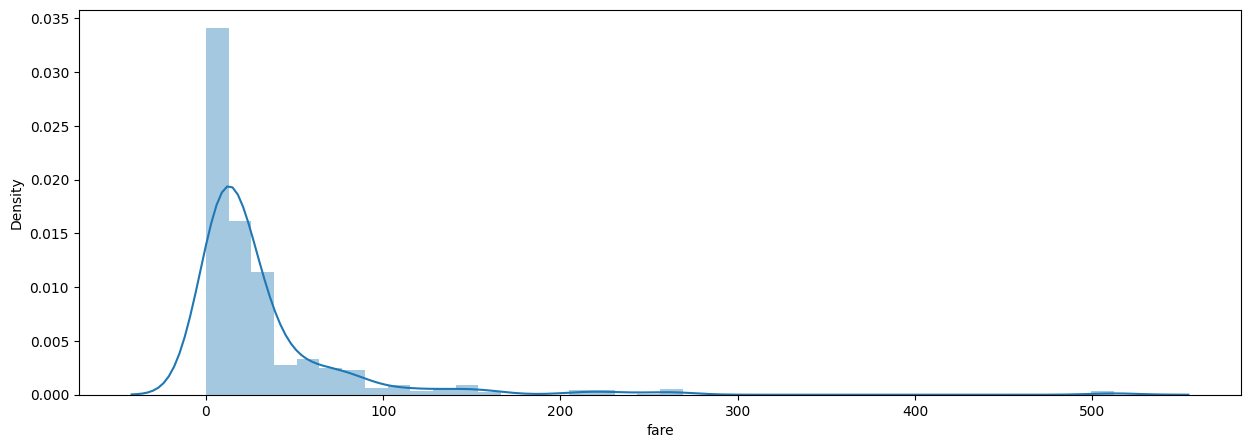

In [62]:
train_fare = train['fare']
plt.figure(figsize=(15,5))
sns.distplot(train_fare,bins=40)


Now we can see that the curve it equally distributed and will perfrom well under any classifier.


In [63]:
fare=train['fare']

Replacing the Fare values by their logerithmic values

Now lets replace the Embarked and Sex columns with their binary values


In [64]:
sex=pd.get_dummies(train['sex'],drop_first=True)
emb=pd.get_dummies(train['embarked'],drop_first=True)

In [65]:
y_train=train['survived']
train.drop(['embarked','sex','survived','fare'],inplace=True,axis=1)

The dummies are created and now the original dataset we need to concate with the newly created one 

In [66]:
X_train=pd.concat([train,sex,emb,fare],axis=1)

In [67]:
X_train

,pclass,age,sibsp,parch,class,who,adult_male,embark_town,alone,male,Q,S,fare
331,1,45.5,0,0,First,man,True,Southampton,True,True,False,True,28.5000
733,2,23.0,0,0,Second,man,True,Southampton,True,True,False,True,13.0000
382,3,32.0,0,0,Third,man,True,Southampton,True,True,False,True,7.9250
704,3,26.0,1,0,Third,man,True,Southampton,False,True,False,True,7.8542
813,3,6.0,4,2,Third,child,False,Southampton,False,False,False,True,31.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,Third,woman,False,Southampton,True,False,False,True,7.6500
270,1,38.0,0,0,First,man,True,Southampton,True,True,False,True,31.0000
860,3,41.0,2,0,Third,man,True,Southampton,False,True,False,True,14.1083
435,1,14.0,1,2,First,child,False,Southampton,False,False,False,True,120.0000


This is our final dataset for training the dataset and same goes for y_train .

I have to perform the following steps on X_test i.e. test data as well bcz even it contains some of the data like this 
.Repeat the steps


In [68]:
test_fare=X_test['fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [69]:
test_sex=pd.get_dummies(X_test['sex'],drop_first=True)
test_emb=pd.get_dummies(X_test['embarked'],drop_first=True)
X_test.drop(['embarked','sex','fare'],inplace=True,axis=1)
X_test=pd.concat([X_test,test_sex,test_emb,test_fare],axis=1)

In [70]:
Y_test=pd.concat([X_test,test_sex,test_emb,test_fare,y_test],axis=1)
Y_test=Y_test.dropna(axis=0,how='any')


In [71]:
y_test=Y_test['survived']

In [72]:
X_train

,pclass,age,sibsp,parch,class,who,adult_male,embark_town,alone,male,Q,S,fare
331,1,45.5,0,0,First,man,True,Southampton,True,True,False,True,28.5000
733,2,23.0,0,0,Second,man,True,Southampton,True,True,False,True,13.0000
382,3,32.0,0,0,Third,man,True,Southampton,True,True,False,True,7.9250
704,3,26.0,1,0,Third,man,True,Southampton,False,True,False,True,7.8542
813,3,6.0,4,2,Third,child,False,Southampton,False,False,False,True,31.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,Third,woman,False,Southampton,True,False,False,True,7.6500
270,1,38.0,0,0,First,man,True,Southampton,True,True,False,True,31.0000
860,3,41.0,2,0,Third,man,True,Southampton,False,True,False,True,14.1083
435,1,14.0,1,2,First,child,False,Southampton,False,False,False,True,120.0000


Now we only problm we would face is that our X_test contains 417 rows of data whereas our y_test contains 418 rows of data . So instead initiall while removing the NaN value from fare dataset we would have just used OneHotEncoder for categorical data and IterativeImputer for Numerical data to solve it . But it just one value other way is to just concate it and then drop that value ,  so that it will remove it from our y_test dataset as well.

Now our dataset preprocessing and visualisation is complete and now its time to use the proper method to train and test the dataset to get the best output.

In [73]:
from model import ModelTraining
import pickle as pkl
import plotly.express as px
from sklearn.pipeline import Pipeline
import joblib

In [74]:
columns = ['pclass', 'age', 'sibsp', 'parch', 'male', 'Q', 'S', 'fare']
X_train = X_train[columns]
X_test = X_test[columns]

In [75]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

colunas_quali = [col for col in X_train.columns if X_train[col].dtype not in ['int32', 'int64', 'float32', 'float64']]

for col in colunas_quali:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    encoders[col] = le

/var/folders/gl/nlbr9h6d001c6mdh1d8sy7fc0000gp/T/ipykernel_2528/944969095.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gl/nlbr9h6d001c6mdh1d8sy7fc0000gp/T/ipykernel_2528/944969095.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gl/nlbr9h6d001c6mdh1d8sy7fc0000gp/T/ipykernel_2528/944969095.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [76]:
X_train

,pclass,age,sibsp,parch,male,Q,S,fare
331,1,45.5,0,0,1,0,1,28.5000
733,2,23.0,0,0,1,0,1,13.0000
382,3,32.0,0,0,1,0,1,7.9250
704,3,26.0,1,0,1,0,1,7.8542
813,3,6.0,4,2,0,0,1,31.2750
...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,0,0,1,7.6500
270,1,38.0,0,0,1,0,1,31.0000
860,3,41.0,2,0,1,0,1,14.1083
435,1,14.0,1,2,0,0,1,120.0000


In [77]:
X_test

,pclass,age,sibsp,parch,male,Q,S,fare
709,3,22.0,1,1,True,False,False,2.724304
439,2,31.0,0,0,True,False,True,2.351375
840,3,20.0,0,0,True,False,True,2.070022
720,2,6.0,0,1,False,False,True,3.496508
39,3,14.0,1,0,False,False,False,2.419630
...,...,...,...,...,...,...,...,...
433,3,17.0,0,0,True,False,True,1.963610
773,3,22.0,0,0,True,False,False,1.977547
25,3,38.0,1,5,False,False,True,3.446410
84,2,17.0,0,0,False,False,True,2.351375


In [78]:
for col in encoders:
    X_test[col] = encoders[col].transform(X_test[col])

In [ ]:
titanic_model = ModelTraining(X_train, X_test, y_train, y_test).train(1000)
with open('titanic.pkl', 'wb') as file:
    pkl.dump(titanic_model.best_model['model'], file)
px.line(y=[titanic_model.best_model['history']['val_binary_accuracy'], titanic_model.best_model['history']['val_loss']])


1 camada(s), 1 neurônio(s):


In [ ]:
titanic_model.best_model['accuracy']

0.8435754179954529

In [ ]:
titanic_model.best_model['history']['val_binary_Accuracy']

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

In [ ]:
px.line(y=[titanic_model.best_model['history']['val_accuracy'], titanic_model.best_model['history']['val_loss']])